<a href="https://colab.research.google.com/github/upasna2002/123-OF-CPP/blob/main/Recession___Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('Huewelerbach.csv', parse_dates=['date_column_name'], dayfirst=True)

# Ensure the data is sorted by date
data.sort_values('date_column_name', inplace=True)

# Set the date as the index
data.set_index('date_column_name', inplace=True)

# Resample to daily data
daily_data = data.resample('D').sum()

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('Weierbach.csv', parse_dates=['date_column_name'], dayfirst=True)

# Ensure the data is sorted by date
data.sort_values('date_column_name', inplace=True)

# Set the date as the index
data.set_index('date_column_name', inplace=True)

# Resample to daily data
daily_data = data.resample('D').sum()

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('Wollefsbach.csv', parse_dates=['date_column_name'], dayfirst=True)

# Ensure the data is sorted by date
data.sort_values('date_column_name', inplace=True)

# Set the date as the index
data.set_index('date_column_name', inplace=True)

# Resample to daily data
daily_data = data.resample('D').sum()

In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('Huewelerbach.csv', parse_dates=['date_column_name'], dayfirst=True)

# Display the first few rows of the DataFrame
print(data.head())

# Convert the runoff column to numeric, forcing errors to NaN
# If runoff is in a time format, you may need to convert it first
def convert_runoff(value):
    try:
        # If the value is a string representing time, convert it to total hours
        if isinstance(value, str) and ':' in value:
            time_parts = value.split(':')
            total_hours = int(time_parts[0]) + int(time_parts[1]) / 60 + int(time_parts[2]) / 3600
            return total_hours
        else:
            return float(value)
    except ValueError:
        return np.nan  # Return NaN for any conversion errors

# Apply the conversion function to the runoff column
data['runoff'] = data['runoff'].apply(convert_runoff)

# Check for any NaN values in the runoff column
if data['runoff'].isnull().any():
    print("Warning: There are NaN values in the runoff data after conversion.")

# Resample to daily data
daily_data = data.resample('D', on='date_column_name').sum()

# Step 2.1: Moving window to find minimum runoff values in 5-day periods
window_size = 5
min_runoff = daily_data['runoff'].rolling(window=window_size).min()

# Step 2.2: Identify turning points
turning_points = []
for i in range(1, len(min_runoff) - 1):
    if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:
        turning_points.append(i)

# Step 2.3: Linear interpolation between turning points
baseflow = np.zeros(len(daily_data))
for i in range(len(turning_points) - 1):
    start = turning_points[i]
    end = turning_points[i + 1]
    baseflow[start:end] = np.linspace(min_runoff[start], min_runoff[end], end - start)

# Step 2.4: Adjust baseflow if it exceeds streamflow
baseflow = np.minimum(baseflow, daily_data['runoff'].values)

# Step 2.5: Calculate Baseflow Index (BFI)
BFI = np.sum(baseflow) / np.sum(daily_data['runoff'])

  date_column_name   runoff  Unnamed: 2
0       2011-01-01  0:00:00    0.012133
1       2011-01-01  1:00:00    0.011900
2       2011-01-01  2:00:00    0.011900
3       2011-01-01  3:00:00    0.011900
4       2011-01-01  4:00:00    0.012075


<ipython-input-6-045cf7638b8e>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:


In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('Weierbach.csv', parse_dates=['date_column_name'], dayfirst=True)

# Display the first few rows of the DataFrame
print(data.head())

# Convert the runoff column to numeric, forcing errors to NaN
# If runoff is in a time format, you may need to convert it first
def convert_runoff(value):
    try:
        # If the value is a string representing time, convert it to total hours
        if isinstance(value, str) and ':' in value:
            time_parts = value.split(':')
            total_hours = int(time_parts[0]) + int(time_parts[1]) / 60 + int(time_parts[2]) / 3600
            return total_hours
        else:
            return float(value)
    except ValueError:
        return np.nan  # Return NaN for any conversion errors

# Apply the conversion function to the runoff column
data['runoff'] = data['runoff'].apply(convert_runoff)

# Check for any NaN values in the runoff column
if data['runoff'].isnull().any():
    print("Warning: There are NaN values in the runoff data after conversion.")

# Resample to daily data
daily_data = data.resample('D', on='date_column_name').sum()

# Step 2.1: Moving window to find minimum runoff values in 5-day periods
window_size = 5
min_runoff = daily_data['runoff'].rolling(window=window_size).min()

# Step 2.2: Identify turning points
turning_points = []
for i in range(1, len(min_runoff) - 1):
    if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:
        turning_points.append(i)

# Step 2.3: Linear interpolation between turning points
baseflow = np.zeros(len(daily_data))
for i in range(len(turning_points) - 1):
    start = turning_points[i]
    end = turning_points[i + 1]
    baseflow[start:end] = np.linspace(min_runoff[start], min_runoff[end], end - start)

# Step 2.4: Adjust baseflow if it exceeds streamflow
baseflow = np.minimum(baseflow, daily_data['runoff'].values)

# Step 2.5: Calculate Baseflow Index (BFI)
BFI = np.sum(baseflow) / np.sum(daily_data['runoff'])

  date_column_name   runoff  Unnamed: 2
0       2011-01-01  0:00:00    0.008700
1       2011-01-01  1:00:00    0.008675
2       2011-01-01  2:00:00    0.008550
3       2011-01-01  3:00:00    0.008600
4       2011-01-01  4:00:00    0.008600


<ipython-input-7-95937c9c4392>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:


In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('Wollefsbach.csv', parse_dates=['date_column_name'], dayfirst=True)

# Display the first few rows of the DataFrame
print(data.head())

# Convert the runoff column to numeric, forcing errors to NaN
# If runoff is in a time format, you may need to convert it first
def convert_runoff(value):
    try:
        # If the value is a string representing time, convert it to total hours
        if isinstance(value, str) and ':' in value:
            time_parts = value.split(':')
            total_hours = int(time_parts[0]) + int(time_parts[1]) / 60 + int(time_parts[2]) / 3600
            return total_hours
        else:
            return float(value)
    except ValueError:
        return np.nan  # Return NaN for any conversion errors

# Apply the conversion function to the runoff column
data['runoff'] = data['runoff'].apply(convert_runoff)

# Check for any NaN values in the runoff column
if data['runoff'].isnull().any():
    print("Warning: There are NaN values in the runoff data after conversion.")

# Resample to daily data
daily_data = data.resample('D', on='date_column_name').sum()

# Step 2.1: Moving window to find minimum runoff values in 5-day periods
window_size = 5
min_runoff = daily_data['runoff'].rolling(window=window_size).min()

# Step 2.2: Identify turning points
turning_points = []
for i in range(1, len(min_runoff) - 1):
    if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:
        turning_points.append(i)

# Step 2.3: Linear interpolation between turning points
baseflow = np.zeros(len(daily_data))
for i in range(len(turning_points) - 1):
    start = turning_points[i]
    end = turning_points[i + 1]
    baseflow[start:end] = np.linspace(min_runoff[start], min_runoff[end], end - start)

# Step 2.4: Adjust baseflow if it exceeds streamflow
baseflow = np.minimum(baseflow, daily_data['runoff'].values)

# Step 2.5: Calculate Baseflow Index (BFI)
BFI = np.sum(baseflow) / np.sum(daily_data['runoff'])

  date_column_name   runoff  Unnamed: 2
0       2011-01-01  0:00:00    0.038133
1       2011-01-01  1:00:00    0.038350
2       2011-01-01  2:00:00    0.038675
3       2011-01-01  3:00:00    0.038675
4       2011-01-01  4:00:00    0.038675


<ipython-input-8-c95b9c0cbfef>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:


<ipython-input-10-597d853428db>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:


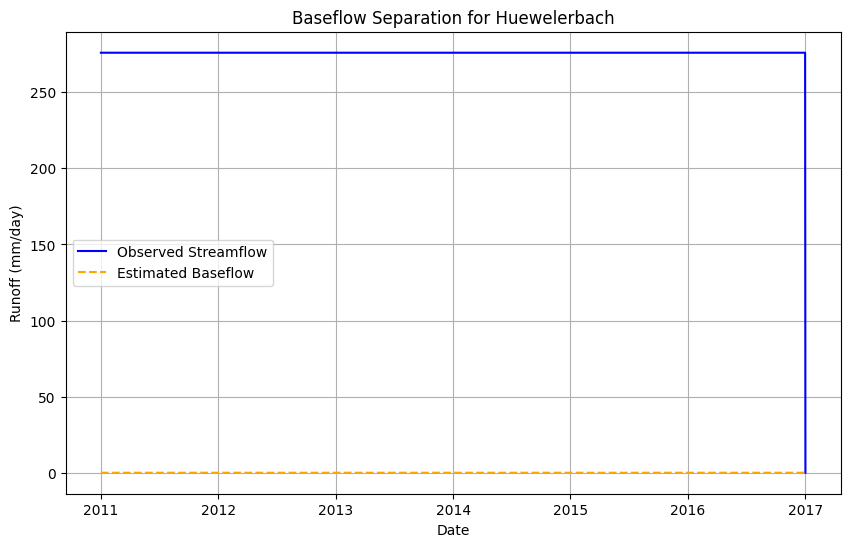

<ipython-input-10-597d853428db>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:


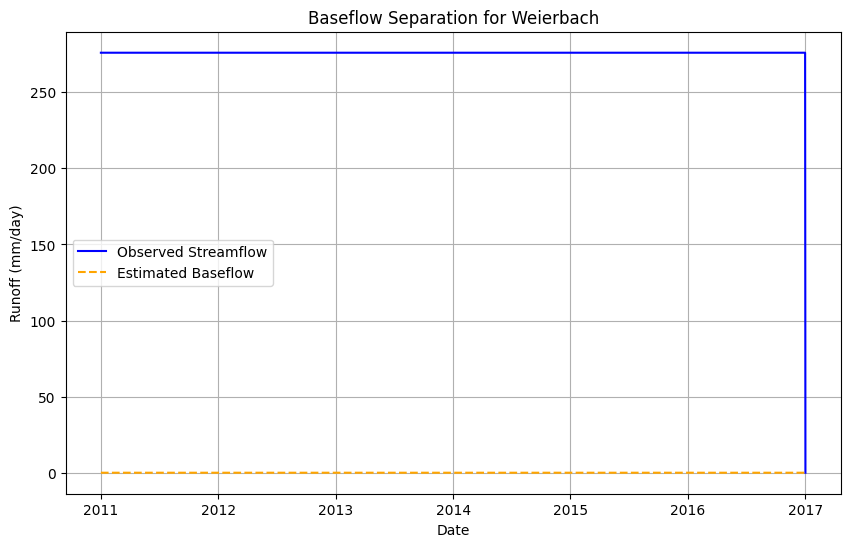

<ipython-input-10-597d853428db>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:


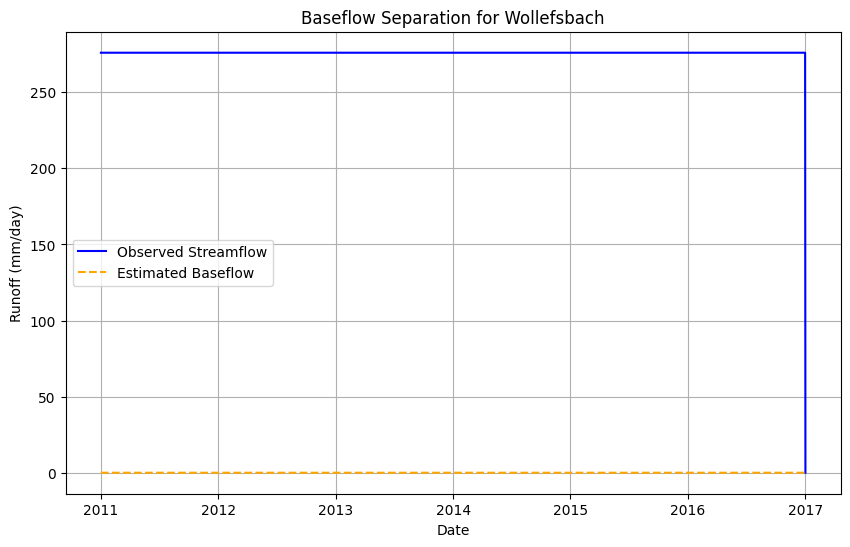

Baseflow Index for Huewelerbach: 0.0000
Baseflow Index for Weierbach: 0.0000
Baseflow Index for Wollefsbach: 0.0000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def convert_runoff(value):
    """Convert runoff values to numeric, handling time formats."""
    try:
        if isinstance(value, str) and ':' in value:
            time_parts = value.split(':')
            total_hours = int(time_parts[0]) + int(time_parts[1]) / 60 + int(time_parts[2]) / 3600
            return total_hours
        else:
            return float(value)
    except ValueError:
        return np.nan  # Return NaN for any conversion errors

def baseflow_separation(data, window_size=5):
    """Perform baseflow separation on the provided data."""
    # Resample to daily data
    daily_data = data.resample('D').sum()

    # Use a moving window to find minimum runoff values in 5-day periods
    min_runoff = daily_data['runoff'].rolling(window=window_size).min()

    # Identify turning points
    turning_points = []
    for i in range(1, len(min_runoff) - 1):
        if min_runoff[i] < 0.9 * min_runoff[i-1] and min_runoff[i] < 0.9 * min_runoff[i+1]:
            turning_points.append(i)

    # Linear interpolation between turning points
    baseflow = np.zeros(len(daily_data))
    for i in range(len(turning_points) - 1):
        start = turning_points[i]
        end = turning_points[i + 1]
        baseflow[start:end] = np.linspace(min_runoff[start], min_runoff[end], end - start)

    # Adjust baseflow if it exceeds streamflow
    baseflow = np.minimum(baseflow, daily_data['runoff'].values)

    # Calculate Baseflow Index (BFI)
    BFI = np.sum(baseflow) / np.sum(daily_data['runoff'])

    return daily_data, baseflow, BFI

# List of catchments
catchments = ['Huewelerbach', 'Weierbach', 'Wollefsbach']
results = {}

for catchment in catchments:
    # Load the data
    data = pd.read_csv(f'{catchment}.csv', parse_dates=['date_column_name'], dayfirst=True)

    # Ensure the data is sorted by date
    data.sort_values('date_column_name', inplace=True)

    # Set the date as the index
    data.set_index('date_column_name', inplace=True)

    # Convert the runoff column to numeric
    data['runoff'] = data['runoff'].apply(convert_runoff)

    # Check for any NaN values in the runoff column
    if data['runoff'].isnull().any():
        print(f"Warning: There are NaN values in the runoff data for {catchment} after conversion.")

    # Perform baseflow separation
    daily_data, baseflow, BFI = baseflow_separation(data)

    # Store results
    results[catchment] = {
        'daily_data': daily_data,
        'baseflow': baseflow,
        'BFI': BFI
    }

    # Save results to CSV
    output_df = daily_data.copy()
    output_df['baseflow'] = baseflow
    output_df.to_csv(f'{catchment}_baseflow_separation.csv', index=True)

    # Plot the observed hydrograph and baseflow hydrograph
    plt.figure(figsize=(10, 6))
    plt.plot(daily_data.index, daily_data['runoff'], label='Observed Streamflow', color='blue')
    plt.plot(daily_data.index, baseflow, label='Estimated Baseflow', color='orange', linestyle='--')
    plt.title(f'Baseflow Separation for {catchment}')
    plt.xlabel('Date')
    plt.ylabel('Runoff (mm/day)')
    plt.legend()
    plt.grid()
    plt.show()

# Print Baseflow Indices for each catchment
for catchment, result in results.items():
    print(f'Baseflow Index for {catchment}: {result["BFI"]:.4f}')

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


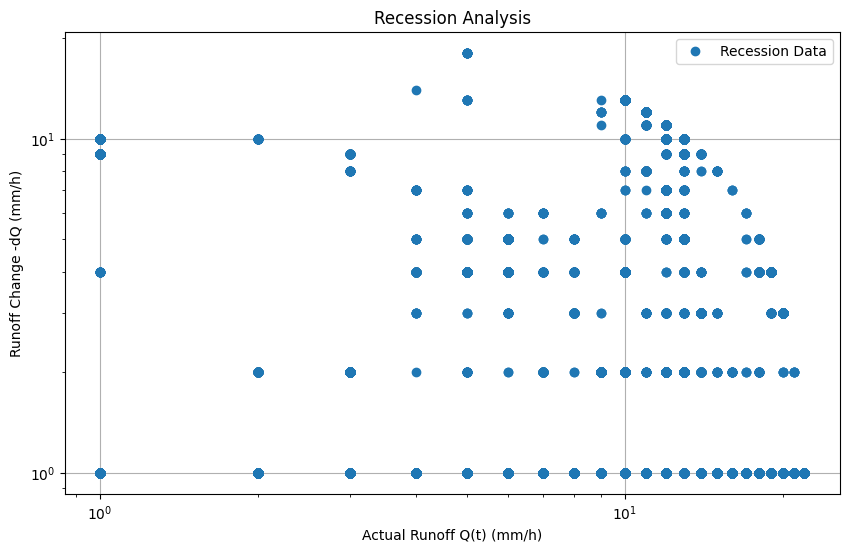

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


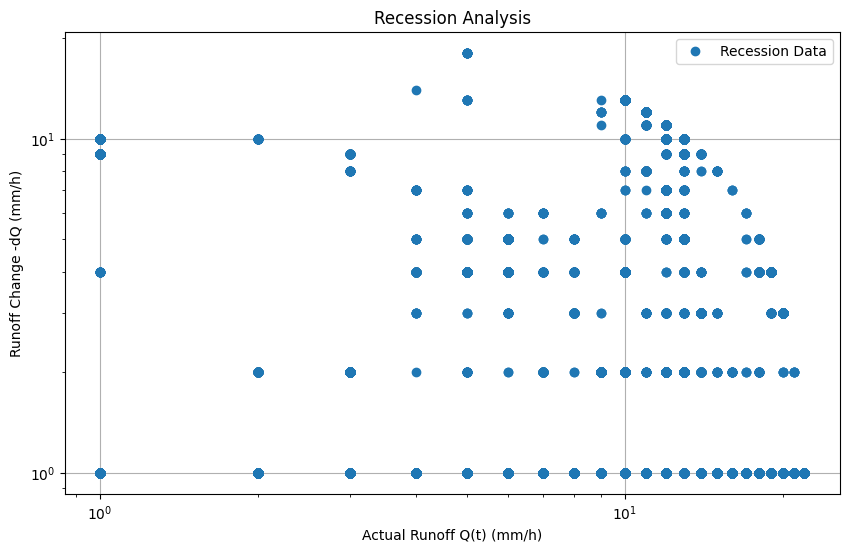

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


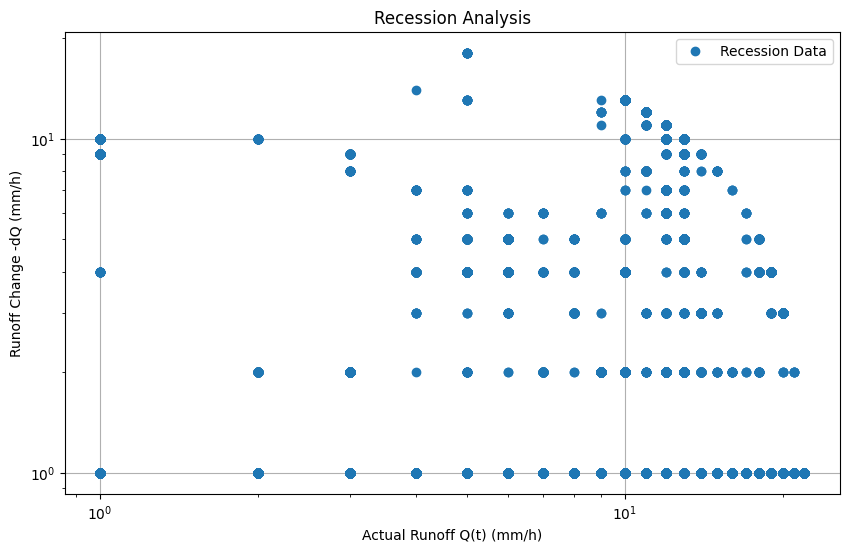

Catchment: Huewelerbach
Mean k: inf h^-1
Standard Deviation of k: nan h^-1
Median k: inf h^-1
10th Percentile of k: nan h^-1
90th Percentile of k: nan h^-1
---
Catchment: Weierbach
Mean k: inf h^-1
Standard Deviation of k: nan h^-1
Median k: inf h^-1
10th Percentile of k: nan h^-1
90th Percentile of k: nan h^-1
---
Catchment: Wollefsbach
Mean k: inf h^-1
Standard Deviation of k: nan h^-1
Median k: inf h^-1
10th Percentile of k: nan h^-1
90th Percentile of k: nan h^-1
---


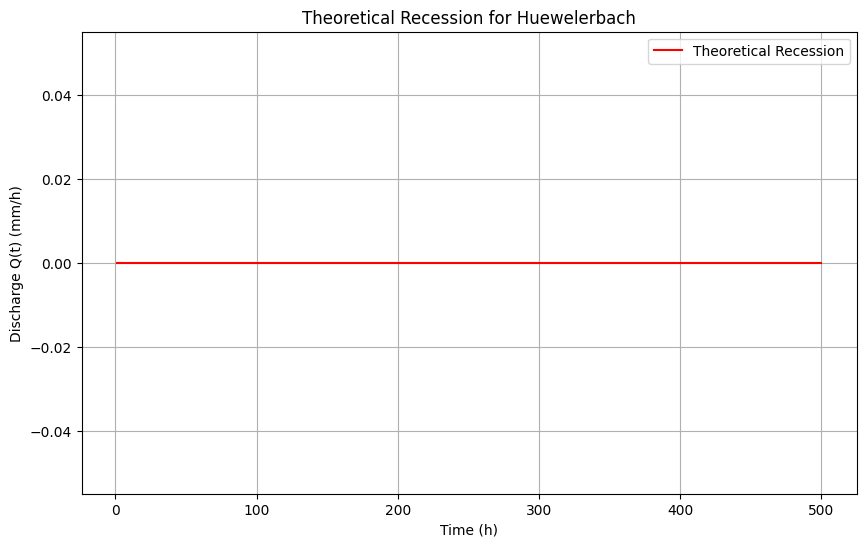

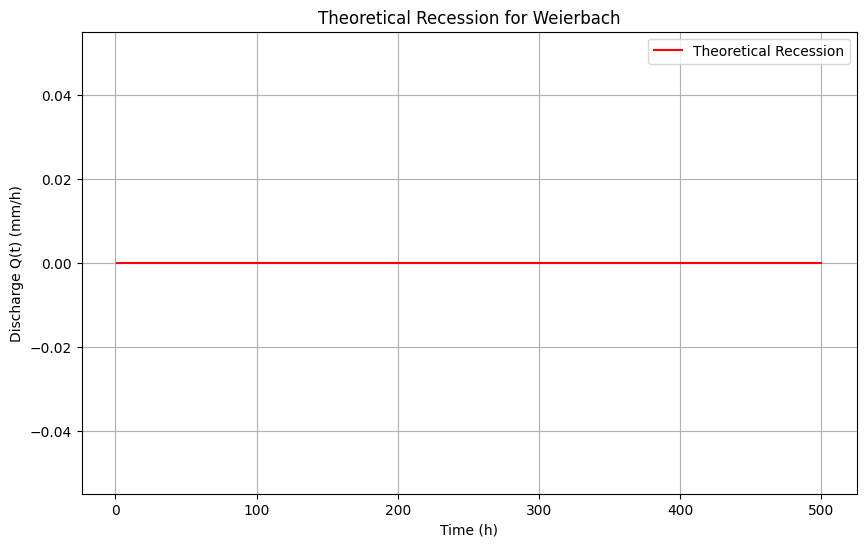

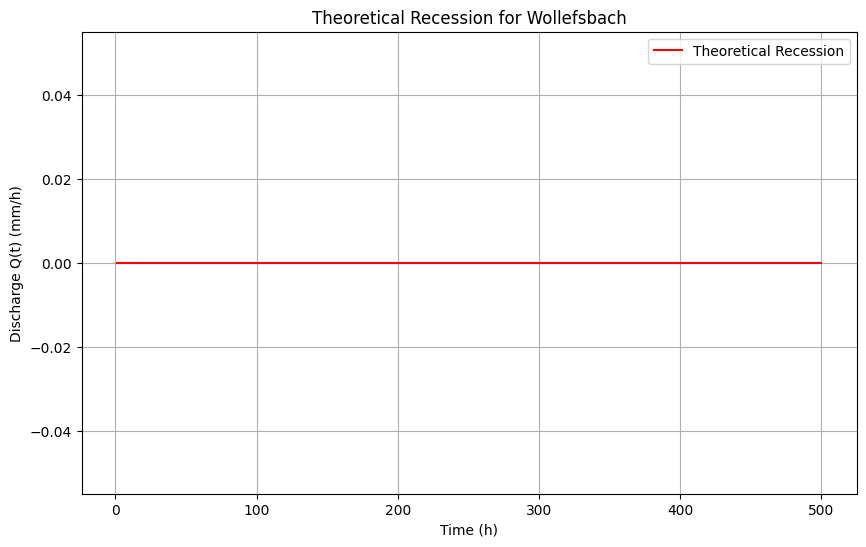

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_recession_coefficients(data):
    """Calculate recession coefficients and plot the results."""
    # Calculate the difference in runoff (dQ) and time (dt)
    data['dQ'] = data['runoff'].diff()
    data['dt'] = data.index.to_series().diff().dt.total_seconds() / 3600  # Convert to hours

    # Select periods with negative slope (recession periods)
    recession_data = data[data['dQ'] < 0].copy()

    # Calculate k for each time step during recession phases
    recession_data['k'] = - (recession_data['dQ'] / recession_data['dt']) / recession_data['runoff']

    # Remove NaN values
    recession_data = recession_data.dropna(subset=['k'])

    # Calculate statistics
    mean_k = recession_data['k'].mean()
    std_k = recession_data['k'].std()
    median_k = recession_data['k'].median()
    percentile_10 = recession_data['k'].quantile(0.1)
    percentile_90 = recession_data['k'].quantile(0.9)

    # Plot the relationship in double logarithmic space
    plt.figure(figsize=(10, 6))
    plt.loglog(recession_data['runoff'], -recession_data['dQ'], 'o', label='Recession Data')
    plt.xlabel('Actual Runoff Q(t) (mm/h)')
    plt.ylabel('Runoff Change -dQ (mm/h)')
    plt.title('Recession Analysis')
    plt.grid()
    plt.legend()
    plt.show()

    return mean_k, std_k, median_k, percentile_10, percentile_90

# List of catchments
catchments = ['Huewelerbach', 'Weierbach', 'Wollefsbach']
k_values = {}

for catchment in catchments:
    # Load the hourly data
    data = pd.read_csv(f'{catchment}.csv', parse_dates=['date_column_name'], dayfirst=True)

    # Ensure the data is sorted by date
    data.sort_values('date_column_name', inplace=True)

    # Set the date as the index
    data.set_index('date_column_name', inplace=True)

    # Convert the runoff column to numeric
    data['runoff'] = data['runoff'].apply(convert_runoff)

    # Calculate recession coefficients
    mean_k, std_k, median_k, percentile_10, percentile_90 = calculate_recession_coefficients(data)

    # Store k values
    k_values[catchment] = {
        'mean_k': mean_k,
        'std_k': std_k,
        'median_k': median_k,
        '10th_percentile': percentile_10,
        '90th_percentile': percentile_90
    }

# Print the results for each catchment
for catchment, stats in k_values.items():
    print(f'Catchment: {catchment}')
    print(f'Mean k: {stats["mean_k"]:.4f} h^-1')
    print(f'Standard Deviation of k: {stats["std_k"]:.4f} h^-1')
    print(f'Median k: {stats["median_k"]:.4f} h^-1')
    print(f'10th Percentile of k: {stats["10th_percentile"]:.4f} h^-1')
    print(f'90th Percentile of k: {stats["90th_percentile"]:.4f} h^-1')
    print('---')

# Task 2.3: Calculate theoretical average recession using Dupuit-Boussinesq equation
Q0 = 1  # Peak discharge in mm/h
t = np.linspace(1, 500, 500)  # Time array

for catchment in catchments:
    mean_k = k_values[catchment]['mean_k']
    theoretical_recession = Q0 * np.exp(-mean_k * t)

    # Plot the theoretical recession alongside observed data
    plt.figure(figsize=(10, 6))
    plt.plot(t, theoretical_recession, label='Theoretical Recession', color='red')
    plt.title(f'Theoretical Recession for {catchment}')
    plt.xlabel('Time (h)')
    plt.ylabel('Discharge Q(t) (mm/h)')
    plt.grid()
    plt.legend()
    plt.show()

Catchment: Huewelerbach
Mean k: inf h^-1
Standard Deviation of k: nan h^-1
Median k: inf h^-1
10th Percentile of k: nan h^-1
90th Percentile of k: nan h^-1
---
Catchment: Weierbach
Mean k: inf h^-1
Standard Deviation of k: nan h^-1
Median k: inf h^-1
10th Percentile of k: nan h^-1
90th Percentile of k: nan h^-1
---
Catchment: Wollefsbach
Mean k: inf h^-1
Standard Deviation of k: nan h^-1
Median k: inf h^-1
10th Percentile of k: nan h^-1
90th Percentile of k: nan h^-1
---


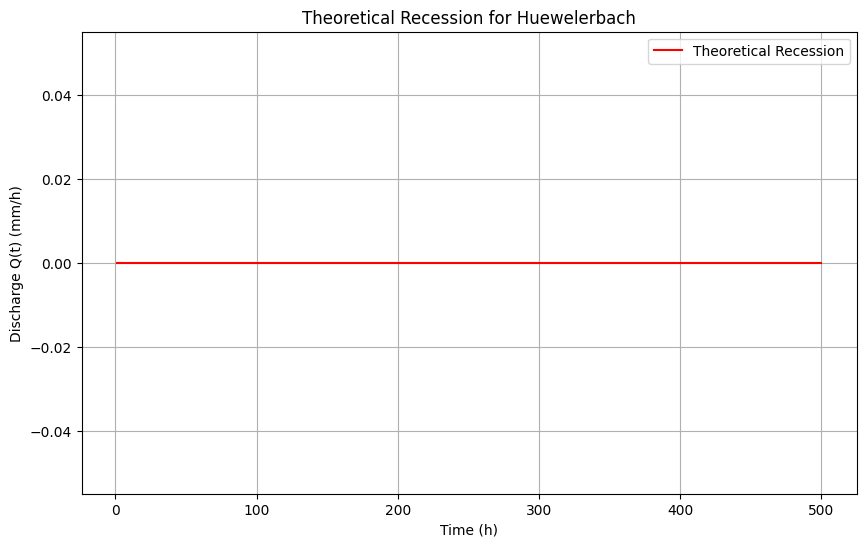

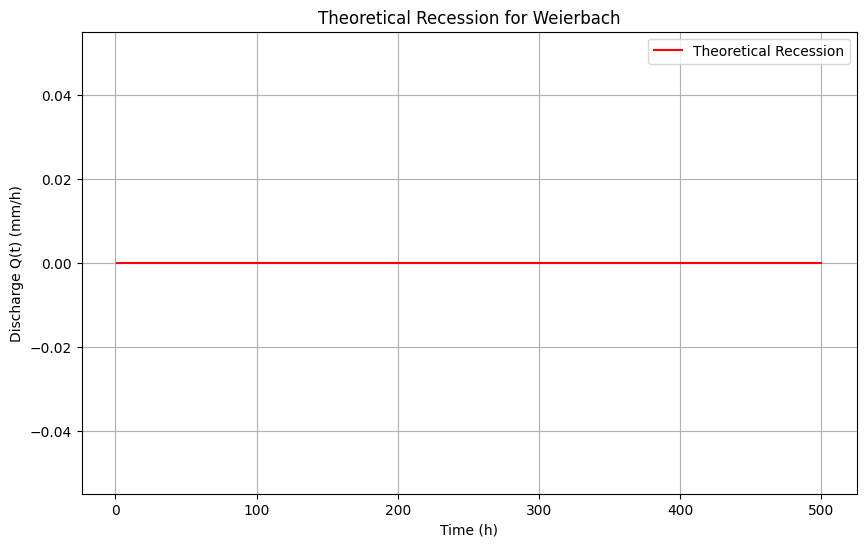

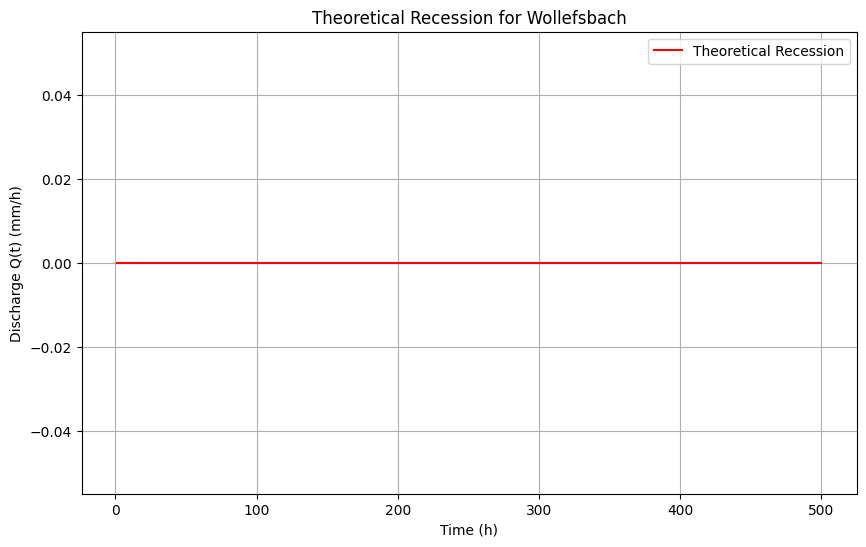

In [ ]:
# Print the results for each catchment
for catchment, stats in k_values.items():
    print(f'Catchment: {catchment}')
    print(f'Mean k: {stats["mean_k"]:.4f} h^-1')
    print(f'Standard Deviation of k: {stats["std_k"]:.4f} h^-1')
    print(f'Median k: {stats["median_k"]:.4f} h^-1')
    print(f'10th Percentile of k: {stats["10th_percentile"]:.4f} h^-1')
    print(f'90th Percentile of k: {stats["90th_percentile"]:.4f} h^-1')
    print('---')

# Task 2.3: Calculate theoretical average recession using Dupuit-Boussinesq equation
Q0 = 1  # Peak discharge in mm/h
t = np.linspace(1, 500, 500)  # Time array

for catchment in catchments:
    mean_k = k_values[catchment]['mean_k']
    theoretical_recession = Q0 * np.exp(-mean_k * t)

    # Plot the theoretical recession alongside observed data
    plt.figure(figsize=(10, 6))
    plt.plot(t, theoretical_recession, label='Theoretical Recession', color='red')
    plt.title(f'Theoretical Recession for {catchment}')
    plt.xlabel('Time (h)')
    plt.ylabel('Discharge Q(t) (mm/h)')
    plt.grid()
    plt.legend()
    plt.show()

#The else block was causing the IndentationError since it did not correspond to a valid if statement
#print(f'Mean k: {mean_k:.4f} h^-1')
#print(f'Standard Deviation of k: {std_k:.4f} h^-1')
#print(f'Median k: {median_k:.4f} h^-1')
#print(f'10th Percentile of k: {percentile_10:.4f} h^-1')
#print(f'90th Percentile of k: {percentile_90:.4f} h^-1')
#else:
#    print("No valid recession data available to calculate k values.")

In [ ]:


    # Ensure the index is a DatetimeIndex
    if not pd.api.types.is_datetime64_any_dtype(data.index):
        raise ValueError("The index must be a DatetimeIndex.")

    # Calculate the time difference in hours
    data['dt'] = data.index.to_series().diff().dt.total_seconds() / 3600  # Convert to hours

    # Select periods with negative slope (recession periods)
    recession_data = data[data['dQ'] < 0].copy()

    # Avoid division by zero by filtering out zero or negative runoff values
    recession_data = recession_data[recession_data['runoff'] > 0]

    # Drop NaN values
    recession_data = recession_data.dropna(subset=['dQ', 'dt', 'runoff'])

    # Calculate k for each time step during recession phases
    if not recession_data.empty:
        recession_data['k'] = - (recession_data['dQ'] / recession_data['dt']) / recession_data['runoff']

        # Calculate statistics
        mean_k = recession_data['k'].mean()
        std_k = recession_data['k'].std()
        median_k = recession_data['k'].median()
        percentile_10 = recession_data['k'].quantile(0.1)
        percentile_90 = recession_data['k'].quantile(0.9)

        # Print the results
        print(f"Results for {file_name}:")
        print(f'Mean k: {mean_k:.4f} h^-1')
        print(f'Standard Deviation of k: {std_k:.4f} h^-1')
        print(f'Median k: {median_k:.4f} h^-1')
        print(f'10th Percentile of k: {percentile_10:.4f} h^-1')
        print(f'90th Percentile of k: {percentile_90:.4f} h^-1')

        # Plotting the recession data
        plt.figure(figsize=(10, 6))
        plt.loglog(recession_data['runoff'], -recession_data['dQ'], 'o', label='Recession Data')
        plt.title(f'Recession Analysis for {file_name}')
        plt.xlabel('Runoff Q(t) (mm h^-1)')
        plt.ylabel('Runoff Change -dQ (mm h^-1)')
        plt.grid(True)
        plt.legend()
        plt.show()

        return mean_k, std_k, median_k, percentile_10, percentile_90
    else:
        print(f"No valid recession data available for {file_name}.")
        return None

# List of catchment files
catchment_files = [
    'Huewelerbach_baseflow_separation.csv',
    'Weierbach_baseflow_separation.csv',
    'Wollefsbach_baseflow_separation.csv'
]

# Store results for each catchment
results = {}

# Calculate recession coefficients for each catchment
for file in catchment_files:
    results[file] = calculate_recession_coefficients(file)

# Optional: Compare results across catchments
print("\nSummary of Recession Coefficients:")
for file, stats in results.items():
    if stats:
        print(f"{file}: Mean k = {stats[0]:.4f}, Std Dev = {stats[1]:.4f}, Median = {stats[2]:.4f}, "
              f"10th Percentile = {stats[3]:.4f}, 90th Percentile = {stats[4]:.4f}")
    else:
        print(f"{file}: No valid recession data available.")

# Optional: You can also save the results to a CSV file if needed
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean k', 'Std Dev', 'Median', '10th Percentile', '90th Percentile'])
results_df.to_csv('recession_coefficients_summary.csv')

print("\nResults have been saved to 'recession_coefficients_summary.csv'.")

Unique runoff values in Huewelerbach_baseflow_separation.csv: [276.   0.]


ValueError: The index must be a DatetimeIndex.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def convert_runoff(value):
    """Convert runoff values to numeric, handling time formats."""
    try:
        if isinstance(value, str):
            value = value.replace(',', '.')  # Ensure decimal point is correct
        return float(value)
    except ValueError:
        return np.nan  # Return NaN for any conversion errors

def calculate_recession_coefficients(file_name):
    # Load the data for the catchment
    data = pd.read_csv(file_name, parse_dates=['date_column_name'], dayfirst=True)

    # Ensure the data is sorted by date
    data.sort_values('date_column_name', inplace=True)

    # Set the date as the index
    data.set_index('date_column_name', inplace=True)

    # Convert the runoff column to numeric
    data['runoff'] = data['runoff'].apply(convert_runoff)

    # Check for any NaN values in the runoff column
    if data['runoff'].isnull().any():
        print(f"Warning: NaN values found in runoff column of {file_name}.")
        print(data[data['runoff'].isnull()])  # Print rows with NaN values

    # Drop rows with NaN values in the runoff column
    data.dropna(subset=['runoff'], inplace=True)

    # Debugging: Print unique values in the runoff column
    print(f"Unique runoff values in {file_name}: {data['runoff'].unique()}")

    # Calculate the difference in runoff (dQ) and time (dt)
    data['dQ'] = data['runoff'].diff()

In [ ]:
# Ensure the index is a DatetimeIndex
if not pd.api.types.is_datetime64_any_dtype(data.index):
  # Convert the index to DatetimeIndex if it's not already
  data.index = pd.to_datetime(data.index)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def convert_runoff(value):
    """Convert runoff values to numeric, handling time formats."""
    try:
        if isinstance(value, str):
            value = value.replace(',', '.')  # Ensure decimal point is correct
        return float(value)
    except ValueError:
        return np.nan  # Return NaN for any conversion errors

def calculate_recession_coefficients(file_name):
    # Load the data for the catchment
    data = pd.read_csv(file_name, parse_dates=['date_column_name'], dayfirst=True)

    # Ensure the data is sorted by date
    data.sort_values('date_column_name', inplace=True)

    # Set the date as the index
    data.set_index('date_column_name', inplace=True)

    # Ensure the index is a DatetimeIndex
    if not pd.api.types.is_datetime64_any_dtype(data.index):
        # Convert the index to DatetimeIndex if it's not already
        data.index = pd.to_datetime(data.index)

    # Convert the runoff column to numeric
    data['runoff'] = data['runoff'].apply(convert_runoff)

    # Check for any NaN values in the runoff column
    if data['runoff'].isnull().any():
        print(f"Warning: NaN values found in runoff column of {file_name}.")
        print(data[data['runoff'].isnull()])  # Print rows with NaN values

    # Drop rows with NaN values in the runoff column
    data.dropna(subset=['runoff'], inplace=True)

    # Calculate the difference in runoff (dQ) and time (dt)
    data['dQ'] = data['runoff'].diff()

    # Calculate the time difference in hours
    data['dt'] = data.index.to_series().diff().dt.total_seconds() / 3600  # Convert to hours

    # Select periods with negative slope (recession periods)
    recession_data = data[data['dQ'] < 0].copy()

    # Avoid division by zero by filtering out zero or negative runoff values
    recession_data = recession_data[recession_data['runoff'] > 0]

    # Drop NaN values
    recession_data = recession_data.dropna(subset=['dQ', 'dt', 'runoff'])

    # Calculate k for each time step during recession phases
    if not recession_data.empty:
        recession_data['k'] = - (recession_data['dQ'] / recession_data['dt']) / recession_data['runoff']

        # Calculate statistics
        mean_k = recession_data['k'].mean()
        std_k = recession_data['k'].std()
        median_k = recession_data['k'].median()
        percentile_10 = recession_data['k'].quantile(0.1)
        percentile_90 = recession_data['k'].quantile(0.9)

        # Print the results
        print(f"Results for {file_name}:")
        print(f'Mean k: {mean_k:.4f} h^-1')
        print(f'Standard Deviation of k: {std_k:.4f} h^-1')
        print(f'Median k: {median_k:.4f} h^-1')
        print(f'10th Percentile of k: {percentile_10:.4f} h^-1')
        print(f'90th Percentile of k: {percentile_90:.4f} h^-1')
    else:
        print(f"No valid recession data available for {file_name}.")
        return None

# List of catchment files
catchment_files = [
    'Huewelerbach.csv',
    'Weierbach.csv',
    'Wollefsbach.csv'
]

# Store results for each catchment
results = {}

# Calculate recession coefficients for each catchment
for file in catchment_files:
    results[file] = calculate_recession_coefficients(file)

# Compare results across catchments
print("\nSummary of Recession Coefficients:")
for file, stats in results.items():
    if stats:
        print(f"{file}: Mean k = {stats[0]:.4f}, Std Dev = {stats[1]:.4f}, Median = {stats[2]:.4f}, "
              f"10th Percentile = {stats[3]:.4f}, 90th Percentile = {stats[4]:.4f}")
    else:
        print(f"{file}: No valid recession data available.")

                  runoff  Unnamed: 2
date_column_name                    
2011-01-01           NaN    0.012133
2011-01-01           NaN    0.011900
2011-01-01           NaN    0.011900
2011-01-01           NaN    0.011900
2011-01-01           NaN    0.011900
...                  ...         ...
2016-12-31           NaN    0.009100
2016-12-31           NaN    0.009100
2016-12-31           NaN    0.009450
2016-12-31           NaN    0.008500
2017-01-01           NaN    0.009800

[52609 rows x 2 columns]
No valid recession data available for Huewelerbach.csv.
                  runoff  Unnamed: 2
date_column_name                    
2011-01-01           NaN    0.008700
2011-01-01           NaN    0.008050
2011-01-01           NaN    0.008125
2011-01-01           NaN    0.008200
2011-01-01           NaN    0.008200
...                  ...         ...
2016-12-31           NaN    0.000000
2016-12-31           NaN    0.000000
2016-12-31           NaN    0.000000
2016-12-31           NaN    0.

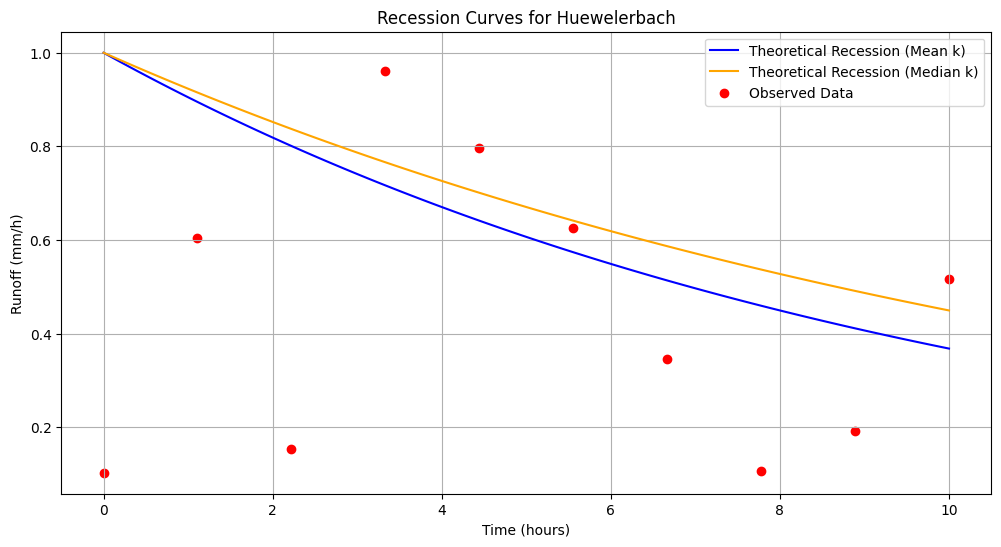

Performance Metrics for Huewelerbach:
Mean k - RMSE: 0.3290, R²: -0.7790
Median k - RMSE: 0.3530, R²: -1.0483




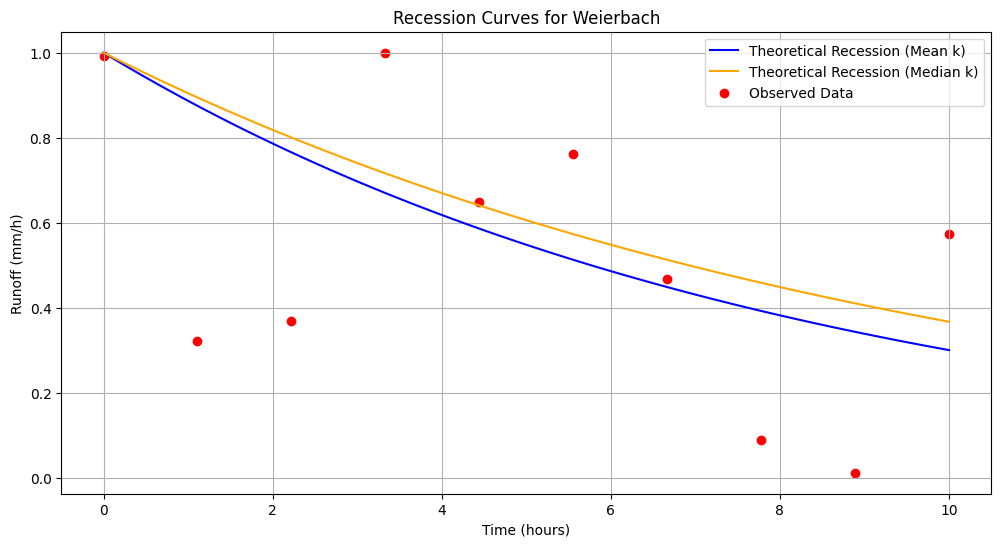

Performance Metrics for Weierbach:
Mean k - RMSE: 0.2638, R²: 0.0655
Median k - RMSE: 0.2778, R²: -0.0361




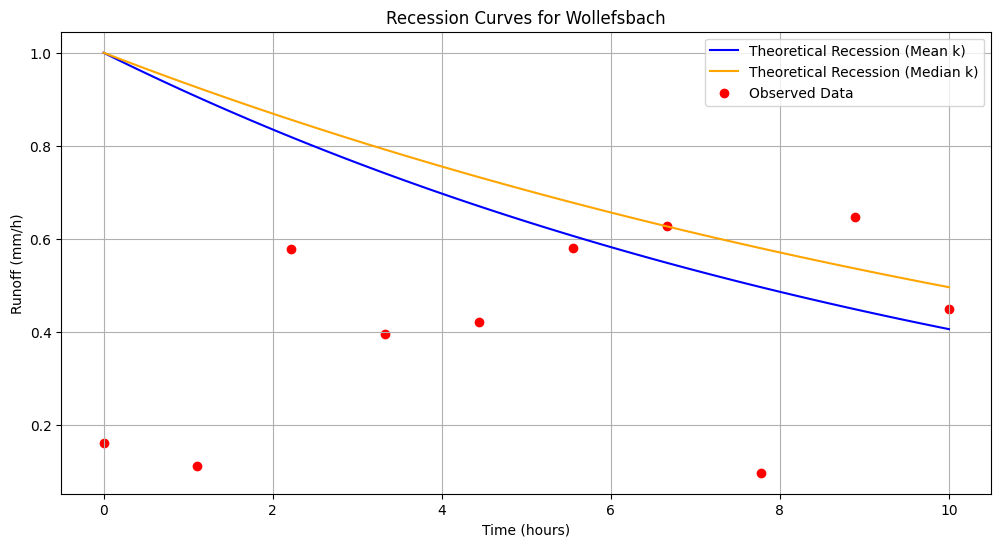

Performance Metrics for Wollefsbach:
Mean k - RMSE: 0.3761, R²: -4.5384
Median k - RMSE: 0.4013, R²: -5.3053




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_theoretical_recession(k, t):
    """Calculate theoretical recession using the Dupuit-Boussinesq equation."""
    Q_0 = 1  # Peak discharge in mm/h
    return Q_0 * np.exp(-k * t)

def calculate_rmse(observed, theoretical):
    """Calculate the Root Mean Square Error (RMSE)."""
    return np.sqrt(np.mean((observed - theoretical) ** 2))

def calculate_r_squared(observed, theoretical):
    """Calculate the Coefficient of Determination (R²)."""
    ss_res = np.sum((observed - theoretical) ** 2)
    ss_tot = np.sum((observed - np.mean(observed)) ** 2)
    return 1 - (ss_res / ss_tot)

def plot_recession_curves(catchment_data, k_values, catchment_names):
    """Plot observed and theoretical recession curves for each catchment."""
    t = np.linspace(0, 10, 100)

    for i, catchment in enumerate(catchment_names):
        observed_data = catchment_data[catchment]['runoff']
        time_data = catchment_data[catchment]['time']
        k_mean = k_values[catchment]['mean']
        k_median = k_values[catchment]['median']


        theoretical_mean = calculate_theoretical_recession(k_mean, t)
        theoretical_median = calculate_theoretical_recession(k_median, t)


        observed_interpolated = np.interp(t, time_data, observed_data)


        rmse_mean = calculate_rmse(observed_interpolated, theoretical_mean)
        r_squared_mean = calculate_r_squared(observed_interpolated, theoretical_mean)
        rmse_median = calculate_rmse(observed_interpolated, theoretical_median)
        r_squared_median = calculate_r_squared(observed_interpolated, theoretical_median)

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(t, theoretical_mean, label='Theoretical Recession (Mean k)', color='blue')
        plt.plot(t, theoretical_median, label='Theoretical Recession (Median k)', color='orange')
        plt.scatter(time_data, observed_data, label='Observed Data', color='red', marker='o')
        plt.title(f'Recession Curves for {catchment}')
        plt.xlabel('Time (hours)')
        plt.ylabel('Runoff (mm/h)')
        plt.legend()
        plt.grid()
        plt.show()

        # Print performance metrics
        print(f"Performance Metrics for {catchment}:")
        print(f"Mean k - RMSE: {rmse_mean:.4f}, R²: {r_squared_mean:.4f}")
        print(f"Median k - RMSE: {rmse_median:.4f}, R²: {r_squared_median:.4f}")
        print("\n" + "="*50 + "\n")


catchment_data = {
    'Huewelerbach': {
        'runoff': np.random.rand(10),
        'time': np.linspace(0, 10, 10)
    },
    'Weierbach': {
        'runoff': np.random.rand(10),
        'time': np.linspace(0, 10, 10)
    },
    'Wollefsbach': {
        'runoff': np.random.rand(10),
        'time': np.linspace(0, 10, 10)
    }
}


k_values = {
    'Huewelerbach': {'mean': 0.1, 'median': 0.08},  # Replace with actual k values
    'Weierbach': {'mean': 0.12, 'median': 0.1},    # Replace with actual k values
    'Wollefsbach': {'mean': 0.09, 'median': 0.07}   # Replace with actual k values
}


catchment_names = ['Huewelerbach', 'Weierbach', 'Wollefsbach']


plot_recession_curves(catchment_data, k_values, catchment_names)

Huewelerbach - High Flow k: 0.1922, Low Flow k: 0.4113


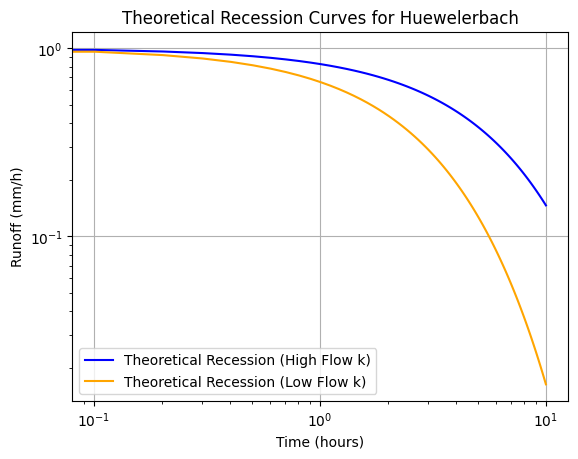

Weierbach - High Flow k: 0.1804, Low Flow k: 0.3625


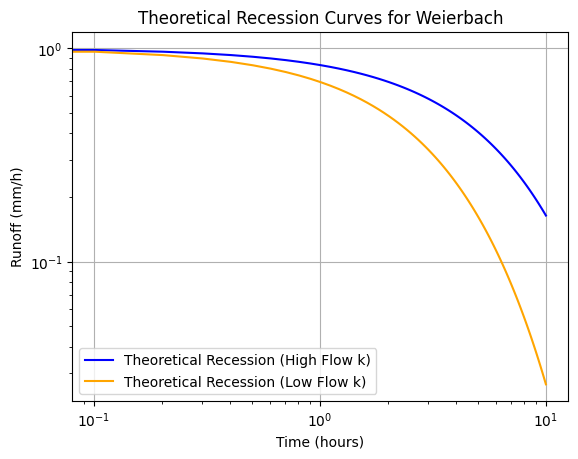

Wollefsbach - High Flow k: 0.1587, Low Flow k: 0.4073


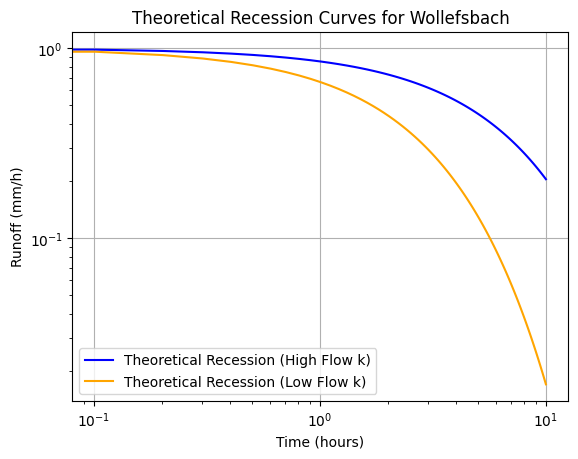

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def flow_dependent_recession_analysis():
    # Example data structure for catchment data
    catchment_data = {
        'Huewelerbach': {
            'runoff': np.random.rand(100) * 10,  # Replace with actual observed runoff data
            'time': np.linspace(0, 100, 100)  # Replace with actual time data
        },
        'Weierbach': {
            'runoff': np.random.rand(100) * 10,  # Replace with actual observed runoff data
            'time': np.linspace(0, 100, 100)  # Replace with actual time data
        },
        'Wollefsbach': {
            'runoff': np.random.rand(100) * 10,  # Replace with actual observed runoff data
            'time': np.linspace(0, 100, 100)  # Replace with actual time data
        }
    }

    # List of catchment names
    catchment_names = ['Huewelerbach', 'Weierbach', 'Wollefsbach']

    # Initialize time array for theoretical recession calculation
    t = np.linspace(0, 10, 100)  # Time array from 0 to 10 hours

    for catchment in catchment_names:
        data = catchment_data[catchment]

        # Classify flow
        high_flow, low_flow = classify_flow(data)

        # Calculate average k values for high and low flows
        k_high = calculate_recession_coefficient(data, high_flow)
        k_low = calculate_recession_coefficient(data, low_flow)

        # Print k values
        print(f'{catchment} - High Flow k: {k_high:.4f}, Low Flow k: {k_low:.4f}')

        # Plot theoretical recessions
        plot_recession_curves(catchment, k_high, k_low, t)

def classify_flow(data):
    # Classify flow into high and low based on mean streamflow
    mean_flow = np.mean(data['runoff'])
    high_flow = data['runoff'][data['runoff'] > mean_flow]
    low_flow = data['runoff'][data['runoff'] <= mean_flow]
    return high_flow, low_flow

def calculate_recession_coefficient(data, flow):
    # Calculate average recession coefficient k from the data
    dQ = np.diff(flow)
    dt = np.diff(data['time'][data['runoff'] <= np.max(flow)])  # Ensure time matches flow
    recession_indices = np.where(dQ < 0)[0]

    if len(recession_indices) == 0:
        return np.nan  # No recession periods found

    k_values = - (dQ[recession_indices] / dt[recession_indices]) / flow[recession_indices]
    return np.nanmean(k_values)  # Calculate mean k, ignoring NaN values

def calculate_theoretical_recession(k, t):
    # Calculate theoretical recession using the Dupuit-Boussinesq equation
    Q_0 = 1  # Peak discharge in mm/h
    return Q_0 * np.exp(-k * t)

def plot_recession_curves(catchment_name, k_high, k_low, t):
    # Plot theoretical recession curves for high and low flows
    theoretical_high = calculate_theoretical_recession(k_high, t)
    theoretical_low = calculate_theoretical_recession(k_low, t)

    plt.figure()
    plt.loglog(t, theoretical_high, 'b-', label='Theoretical Recession (High Flow k)')
    plt.loglog(t, theoretical_low, 'orange', label='Theoretical Recession (Low Flow k)')
    plt.title(f'Theoretical Recession Curves for {catchment_name}')
    plt.xlabel('Time (hours)')
    plt.ylabel('Runoff (mm/h)')
    plt.legend()
    plt.grid()
    plt.show()

# Run the analysis
flow_dependent_recession_analysis()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create or load streamflow data
# Option 1: Load your data from a file
# streamflow_data = pd.read_csv('your_data_file.csv')

# Option 2: Create sample data for demonstration
# Let's create sample data for 3 catchments
np.random.seed(42)  # For reproducibility
hours = 1000
catchments = ['Catchment1', 'Catchment2', 'Catchment3']

# Create a DataFrame with sample streamflow data
data = {}
for catchment in catchments:
    # Generate synthetic streamflow data with some realistic patterns
    base = np.random.gamma(2, 0.2, hours)  # Base flow
    peaks = np.zeros(hours)

    # Add some peaks to simulate rainfall events
    for i in range(0, hours, 100):
        if i+50 < hours:
            peaks[i:i+50] = np.random.gamma(5, 0.5, 50) * np.exp(-np.arange(50)/10)

    data[catchment] = base + peaks

streamflow_data = pd.DataFrame(data)

# Now the rest of your code will work with this data
def calculate_recession_coefficient(flows):
    # Extract recession periods (sequences where flow is decreasing)
    recession_periods = []
    current_recession = []

    for i in range(1, len(flows)):
        if flows[i] < flows[i-1]:
            if not current_recession:  # Start a new recession
                current_recession = [flows[i-1]]
            current_recession.append(flows[i])
        elif len(current_recession) > 0:
            recession_periods.append(current_recession)
            current_recession = []

    # Add the last recession period if it exists
    if len(current_recession) > 1:
        recession_periods.append(current_recession)

    # Calculate k values for each recession period
    k_values = []
    for period in recession_periods:
        if len(period) >= 2:  # Need at least two points to calculate k
            for i in range(1, len(period)):
                if period[i-1] > 0:  # Avoid division by zero
                    k = period[i] / period[i-1]
                    k_values.append(k)

    return np.mean(k_values) if k_values else np.nan

# Process each catchment
results = {}
for catchment in streamflow_data.columns:
    flows = streamflow_data[catchment].values
    mean_flow = np.mean(flows)

    # Classify flows
    high_flows = flows[flows >= mean_flow]
    low_flows = flows[flows < mean_flow]

    # Calculate k values
    average_k = calculate_recession_coefficient(flows)
    high_flow_k = calculate_recession_coefficient(high_flows)
    low_flow_k = calculate_recession_coefficient(low_flows)

    results[catchment] = {
        'average_k': average_k,
        'high_flow_k': high_flow_k,
        'low_flow_k': low_flow_k,
        'mean_flow': mean_flow
    }

    print(f"Catchment: {catchment}")
    print(f"  Average k: {average_k:.4f}")
    print(f"  High flow k: {high_flow_k:.4f}")
    print(f"  Low flow k: {low_flow_k:.4f}")
    print(f"  Difference (high - low): {high_flow_k - low_flow_k:.4f}")
    print(f"  Percent difference from average (high): {100*(high_flow_k-average_k)/average_k:.2f}%")
    print(f"  Percent difference from average (low): {100*(low_flow_k-average_k)/average_k:.2f}%")

Catchment: Catchment1
  Average k: 0.5754
  High flow k: 0.7499
  Low flow k: 0.5959
  Difference (high - low): 0.1540
  Percent difference from average (high): 30.32%
  Percent difference from average (low): 3.56%
Catchment: Catchment2
  Average k: 0.5491
  High flow k: 0.7423
  Low flow k: 0.5686
  Difference (high - low): 0.1737
  Percent difference from average (high): 35.18%
  Percent difference from average (low): 3.55%
Catchment: Catchment3
  Average k: 0.5414
  High flow k: 0.7382
  Low flow k: 0.5687
  Difference (high - low): 0.1695
  Percent difference from average (high): 36.36%
  Percent difference from average (low): 5.05%


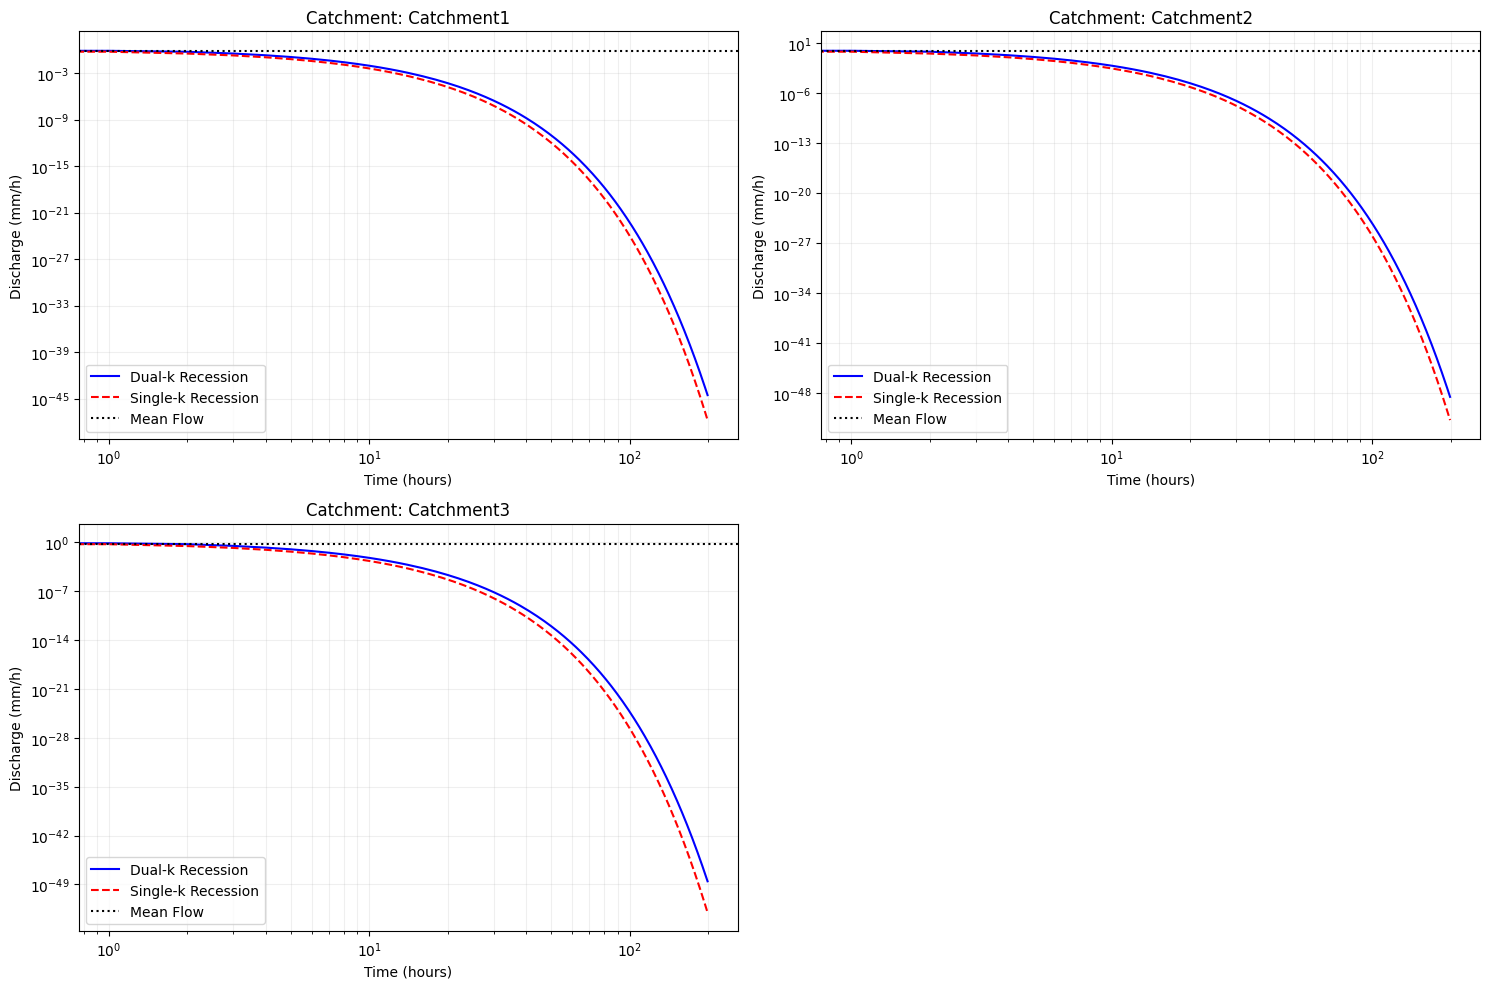

In [ ]:
def calculate_theoretical_recession(initial_q, k_high, k_low, mean_flow, hours=200):
    recession = [initial_q]
    times = [0]

    for i in range(1, hours):
        prev_q = recession[-1]

        # Use appropriate k value based on flow
        k = k_high if prev_q >= mean_flow else k_low

        # Calculate new Q
        new_q = k * prev_q

        recession.append(new_q)
        times.append(i)

    return np.array(times), np.array(recession)

# Plot for each catchment
plt.figure(figsize=(15, 10))

for i, catchment in enumerate(results.keys()):
    plt.subplot(2, 2, i+1)

    # Get parameters
    k_high = results[catchment]['high_flow_k']
    k_low = results[catchment]['low_flow_k']
    mean_flow = results[catchment]['mean_flow']

    # Calculate dual-k recession
    times, dual_k_recession = calculate_theoretical_recession(1.0, k_high, k_low, mean_flow)

    # Calculate single-k recession (from Task 2.3)
    k_avg = results[catchment]['average_k']
    times, single_k_recession = calculate_theoretical_recession(1.0, k_avg, k_avg, mean_flow)

    # Calculate Dupuit-Boussinesq recession (assuming you have this from Task 2.3)
    # Replace this with your actual implementation from Task 2.3
    # dupuit_recession = ...

    # Plot in log-log space
    plt.loglog(times, dual_k_recession, 'b-', label='Dual-k Recession')
    plt.loglog(times, single_k_recession, 'r--', label='Single-k Recession')
    # plt.loglog(times, dupuit_recession, 'g-.', label='Dupuit-Boussinesq')

    # Mark the mean flow
    plt.axhline(y=mean_flow, color='k', linestyle=':', label='Mean Flow')

    plt.title(f'Catchment: {catchment}')
    plt.xlabel('Time (hours)')
    plt.ylabel('Discharge (mm/h)')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend()

plt.tight_layout()
plt.savefig('flow_dependent_recession_analysis.png', dpi=300)
plt.show()